In [9]:
""" Based on https://deeplizard.com/learn/video/HGeI30uATws """

import numpy as np
import gym
import random
import time
from IPython.display import clear_output
from tqdm import tqdm
import matplotlib.pyplot as plt

In [10]:
# Creating The Environment
env = gym.make("FrozenLake-v1")

In [11]:
# Seeding for reproducibility
SEED = 3
env.seed(SEED)
np.random.seed(SEED)
env.action_space.seed(SEED)
clear_output()

In [12]:
# Creating The Q-Table
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
print("action_space_size: ", action_space_size)
print("state_space_size: ", state_space_size)
q_table = np.zeros((state_space_size, action_space_size))
print("Q table size: ", q_table.shape)

action_space_size:  4
state_space_size:  16
Q table size:  (16, 4)


In [13]:
# Initializing Q-Learning Parameters
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.075
discount_rate = 0.99

exploration_rate = 1 # Initially exploring (all q-table vals = 0 at beginning)
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.005

In [14]:
# The Q-Learning Algorithm Training Loop
rewards_all_episodes = []
for episode in tqdm(range(num_episodes)):
    # initialize new episode params
    _state = env.reset()
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):
        # Exploration-exploitation trade-off
        exploration_rate_threshold = np.random.uniform(0,1)
        if exploration_rate_threshold > exploration_rate:
            # Optimal action according to q-table (exploitation)
            action = np.argmax(q_table[_state,:])
        else:
            # Random action (exploration)
            action = env.action_space.sample()

        # Take new action
        new_state, reward, done, info = env.step(action)

        # Update Q-table
        q_table[_state, action] = q_table[_state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))

        # Set new state
        _state = new_state

        # Add new reward
        rewards_current_episode += reward

        if done:
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)

    # Add current episode reward to total rewards list
    rewards_all_episodes.append(rewards_current_episode)


100%|██████████| 10000/10000 [00:03<00:00, 2532.40it/s]


In [15]:
# Calculating average over 100's of episodes
batch_size = 100
avg_rewards = []
for batch in range(int(num_episodes/batch_size)):
    avg_rewards.append(np.mean(rewards_all_episodes[batch_size * batch : batch_size * (batch + 1)]))

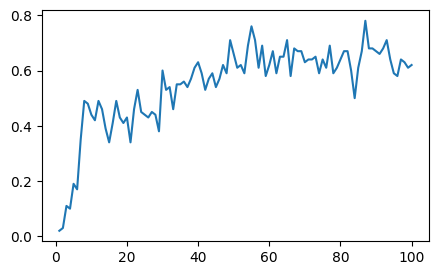

In [16]:
# Plot reward of each 'episode'
fig, ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(list(range(1,len(avg_rewards)+1)), avg_rewards)
plt.show()

In [18]:
# Watch our agent play Frozen Lake by playing the best action
# from each state according to the Q-table

for episode in range(3):
    # initialize new episode params
    state = env.reset()
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)

    for step in range(max_steps_per_episode):
        # Show current state of environment on screen
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        # Choose action with highest Q-value for current state
        action = np.argmax(q_table[state,:])
        # Take new action
        new_state, reward, done, info = env.step(action)

        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                # Agent reached the goal and won episode
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                # Agent stepped in a hole and lost episode
                print("****You fell through a hole!****")
                time.sleep(3)
                clear_output(wait=True)
            break

        # Set new state
        state = new_state

env.close()

  (Left)
SFFF
FHFH
FFFH
HFFG


KeyboardInterrupt: 